Null values in the DataFrame:
datetime           0
file               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
img                0
dtype: int64


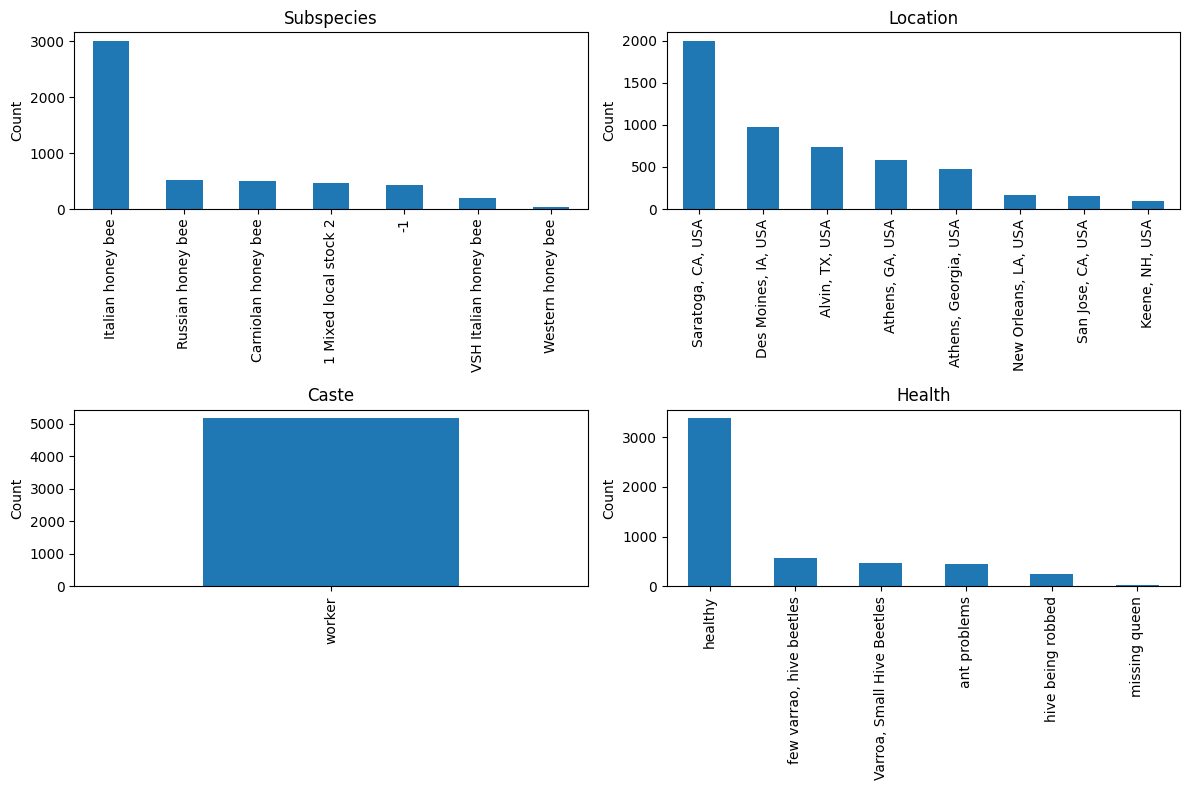

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:100: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


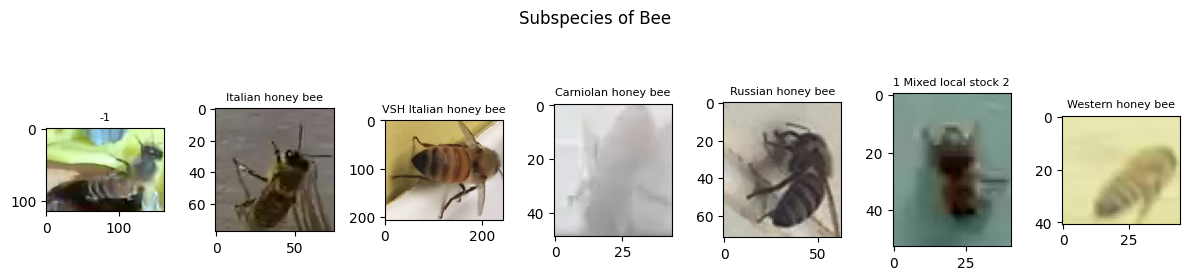

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:116: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


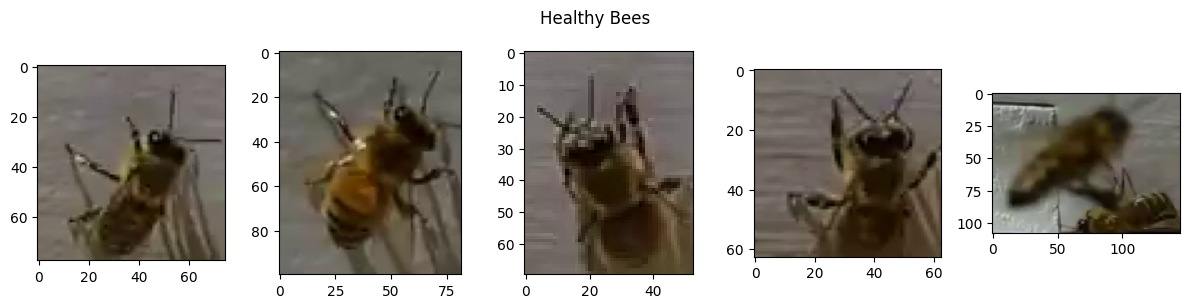

Checking file path: bee_imgs\038_362.png
Checking file path: bee_imgs\030_204.png
Checking file path: bee_imgs\036_094.png
Checking file path: bee_imgs\041_066.png
Checking file path: bee_imgs\034_032.png


c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:137: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


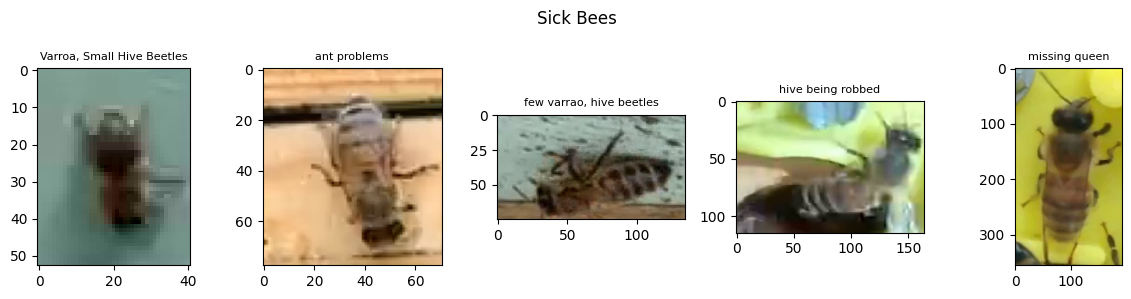

Epoch 1/10
311/311 [==============================] - 9s 27ms/step - loss: 9.5060 - subspecies_loss: 4.5227 - health_loss: 4.9832 - subspecies_accuracy: 0.5482 - health_accuracy: 0.5894 - val_loss: 78.1366 - val_subspecies_loss: 45.9152 - val_health_loss: 32.2214 - val_subspecies_accuracy: 0.5477 - val_health_accuracy: 0.6430
Epoch 2/10
311/311 [==============================] - 8s 27ms/step - loss: 364.7071 - subspecies_loss: 174.8317 - health_loss: 189.8755 - subspecies_accuracy: 0.4612 - health_accuracy: 0.5305 - val_loss: 1292.3723 - val_subspecies_loss: 803.1998 - val_health_loss: 489.1722 - val_subspecies_accuracy: 0.5554 - val_health_accuracy: 0.5477
Epoch 3/10
311/311 [==============================] - 8s 27ms/step - loss: 2681.7605 - subspecies_loss: 1259.5504 - health_loss: 1422.2096 - subspecies_accuracy: 0.4570 - health_accuracy: 0.5546 - val_loss: 6805.1436 - val_subspecies_loss: 4289.4854 - val_health_loss: 2515.6597 - val_subspecies_accuracy: 0.2307 - val_health_accuracy

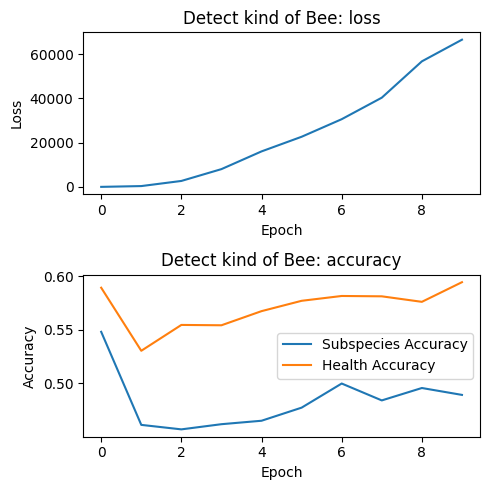

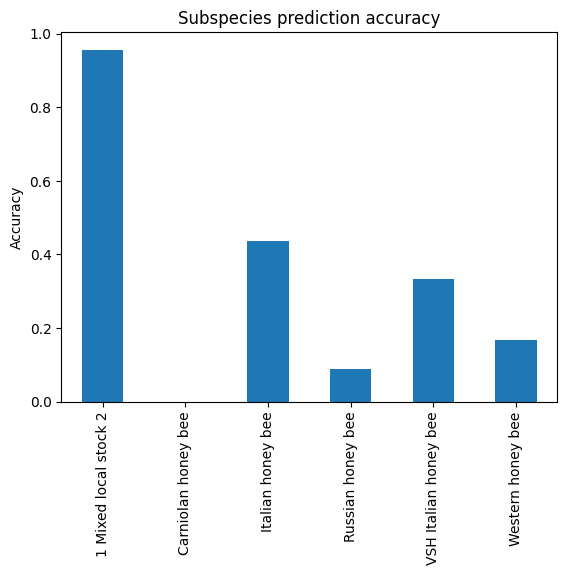

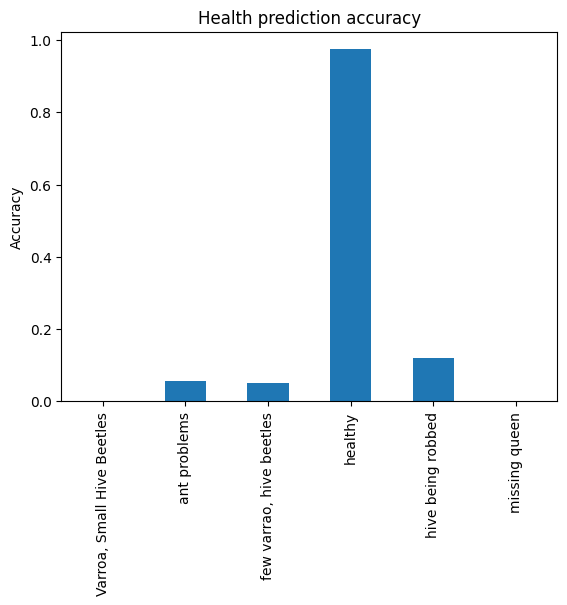

41/41 [==============================] - 1s 20ms/step - loss: 90328.8750 - subspecies_loss: 37912.6445 - health_loss: 52416.2227 - subspecies_accuracy: 0.4107 - health_accuracy: 0.6667
Evaluation: Losses - Subspecies: 90328.875, Health: 37912.64453125, Accuracies - Subspecies: 52416.22265625, Health: 0.4106728434562683
Image: 00.jpg, Predicted Subspecies: VSH Italian honey bee, Predicted Health: healthy
Image: 01.jpg, Predicted Subspecies: Western honey bee, Predicted Health: healthy
Image: 02.jpg, Predicted Subspecies: Western honey bee, Predicted Health: healthy
Image: 03.jpg, Predicted Subspecies: Western honey bee, Predicted Health: healthy
Image: 04.jpg, Predicted Subspecies: Western honey bee, Predicted Health: healthy
Image: 05.jpg, Predicted Subspecies: Western honey bee, Predicted Health: healthy
Image: 06.jpg, Predicted Subspecies: 1 Mixed local stock 2, Predicted Health: healthy


In [5]:
import tensorflow as tf
import pandas as pd
import imageio
import skimage
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Set random seed to make results reproducible
np.random.seed(42)

# Global variables
img_folder = 'bee_imgs'
img_width = 100
img_height = 100
img_channels = 3

# Load existing data
bees = pd.read_csv('bee_data.csv',
                   index_col=False,
                   parse_dates={'datetime': [1, 2]},
                   dtype={'subspecies': 'category', 'health': 'category', 'caste': 'category'})

# Function to read or skip images
def read_or_skip(file):
    try:
        img_path = os.path.join(img_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# Apply the read_or_skip function to create the 'img' column
bees['img'] = bees['file'].apply(read_or_skip)

# Check for null values in the DataFrame
print("Null values in the DataFrame:")
print(bees.isnull().sum())

# Drop rows with null values in the 'img' column
bees.dropna(subset=['img'], inplace=True)

# Visualization of subspecies and health counts

# Create a 2x2 subplot
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot counts of subspecies if the column exists and has non-null values
if 'subspecies' in bees.columns and not bees.subspecies.isnull().all():
    bees.subspecies.value_counts().plot(kind='bar', ax=ax[0, 0])
    ax[0, 0].set_ylabel('Count')
    ax[0, 0].set_title('Subspecies')

# Plot counts of location if the column exists and has non-null values
if 'location' in bees.columns and not bees.location.isnull().all():
    bees.location.value_counts().plot(kind='bar', ax=ax[0, 1])
    ax[0, 1].set_title('Location')
    ax[0, 1].set_ylabel('Count')

# Plot counts of caste if the column exists and has non-null values
if 'caste' in bees.columns and not bees.caste.isnull().all():
    bees.caste.value_counts().plot(kind='bar', ax=ax[1, 0])
    ax[1, 0].set_title('Caste')
    ax[1, 0].set_ylabel('Count')

# Plot counts of health if the column exists and has non-null values
if 'health' in bees.columns and not bees.health.isnull().all():
    bees.health.value_counts().plot(kind='bar', ax=ax[1, 1])
    ax[1, 1].set_title('Health')
    ax[1, 1].set_ylabel('Count')

# Adjust the layout for better spacing
f.subplots_adjust(hspace=0.7)

# Ensure tight layout
f.tight_layout()

# Show the plot
plt.show()

# Update the image loading section
subspecies = bees['subspecies'].unique()[:7]
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 3))
i = 0

# Draw the first found bee of given subspecies
for s in subspecies:
    if s == 'healthy':
        continue
    file = os.path.join(img_folder, bees[bees['subspecies'] == s].iloc[0]['file'])
    im = imageio.imread(file)
    ax[i].imshow(im, resample=True)
    ax[i].set_title(s, fontsize=8)
    i += 1

plt.suptitle("Subspecies of Bee")
plt.tight_layout()
plt.show()

# Display healthy bees
healthy = bees[bees['health'] == 'healthy'].iloc[:5]

f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
# Read image of original size from disk, because bees['img'] contains resized numpy array
for i in range(0, 5):
    file = os.path.join(img_folder, healthy.iloc[i]['file'])
    ax[i].imshow(imageio.imread(file))

plt.suptitle("Healthy Bees")
plt.tight_layout()
plt.show()

health_cats = bees['health'].cat.categories
f, ax = plt.subplots(1, health_cats.size-1, figsize=(12,3))
i = 0

for c in health_cats:
    if c == 'healthy':
        continue

    bee = bees[bees['health'] == c].iloc[0]
    f = bee['file']
    f_path = os.path.join(img_folder, f)  # Use os.path.join for correct path joining

    print(f"Checking file path: {f_path}")

    if os.path.exists(f_path):
        ax[i].imshow(imageio.imread(f_path))
        ax[i].set_title(bee['health'], fontsize=8)
    else:
        print(f"File not found: {f_path}")

    i += 1

plt.suptitle("Sick Bees")
plt.tight_layout()
plt.show()

# Prepare train and test data
labels_subspecies = pd.get_dummies(bees.subspecies, drop_first=True)
labels_health = pd.get_dummies(bees.health)
X = np.stack(bees.img)
train_data, test_data, train_labels_subspecies, test_labels_subspecies, train_labels_health, test_labels_health = train_test_split(
    X, labels_subspecies, labels_health
)

# Define the model using the Functional API
input_layer = Input(shape=(img_width, img_height, img_channels), name='input')
conv1 = Conv2D(5, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPool2D(2)(conv1)
conv2 = Conv2D(15, kernel_size=3, activation='relu')(pool1)
flatten = Flatten()(conv2)

# Output for subspecies prediction
subspecies_output = Dense(labels_subspecies.columns.size, activation='softmax', name='subspecies')(flatten)

# Output for health prediction
health_output = Dense(labels_health.columns.size, activation='softmax', name='health')(flatten)

# Define the model
model = Model(inputs=input_layer, outputs=[subspecies_output, health_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'subspecies': 'categorical_crossentropy', 'health': 'categorical_crossentropy'},
              metrics=['accuracy'])

# Train the model
training = model.fit(
    train_data,
    {'subspecies': train_labels_subspecies, 'health': train_labels_health},
    validation_split=0.2,
    epochs=10,
    batch_size=10
)

# Trained model analysis and evaluation
f, ax = plt.subplots(2, 1, figsize=(5, 5))
ax[0].plot(training.history['loss'])
ax[0].set_title('Detect kind of Bee: loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Accuracy
ax[1].plot(training.history['subspecies_accuracy'], label='Subspecies Accuracy')
ax[1].plot(training.history['health_accuracy'], label='Health Accuracy')
ax[1].set_title('Detect kind of Bee: accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()

# Prediction accuracy by subspecies
test_pred_subspecies, test_pred_health = model.predict(test_data)
acc_by_subspecies = np.logical_and((test_pred_subspecies > 0.5), test_labels_subspecies).sum() / test_labels_subspecies.sum()
acc_by_subspecies.plot(kind='bar', title='Subspecies prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Prediction accuracy by health status
acc_by_health = np.logical_and((test_pred_health > 0.5), test_labels_health).sum() / test_labels_health.sum()
acc_by_health.plot(kind='bar', title='Health prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Evaluation of the model
test_res = model.evaluate(test_data, {'subspecies': test_labels_subspecies, 'health': test_labels_health})
print('Evaluation: Losses - Subspecies: %s, Health: %s, Accuracies - Subspecies: %s, Health: %s' %
      (test_res[0], test_res[1], test_res[2], test_res[3]))

# Save the model
model.save('bee_detection_model.h5')

# Assume you have a directory 'additional_images' containing the new images
additional_images_folder = 'segbee'

# Function to load and preprocess images
def load_and_preprocess_image(file):
    try:
        img_path = os.path.join(additional_images_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# List of new images in the 'additional_images' directory
additional_image_files = os.listdir(additional_images_folder)

# Load and preprocess new images
additional_images = [load_and_preprocess_image(file) for file in additional_image_files]
additional_images = [img for img in additional_images if img is not None]

# Convert the list of images to a NumPy array
additional_images = np.stack(additional_images)

# Predict the subspecies and health status of new images using the trained model
predictions = model.predict(additional_images)
predicted_subspecies_labels = np.argmax(predictions[0], axis=1)
predicted_health_labels = np.argmax(predictions[1], axis=1)

# Convert predicted labels back to subspecies and health categories
predicted_subspecies_categories = labels_subspecies.columns[predicted_subspecies_labels].tolist()
predicted_health_categories = labels_health.columns[predicted_health_labels].tolist()

# Display the results
for i, file in enumerate(additional_image_files):
    print(f"Image: {file}, Predicted Subspecies: {predicted_subspecies_categories[i]}, Predicted Health: {predicted_health_categories[i]}")

Null values in the DataFrame:
datetime           0
file               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
img                0
dtype: int64


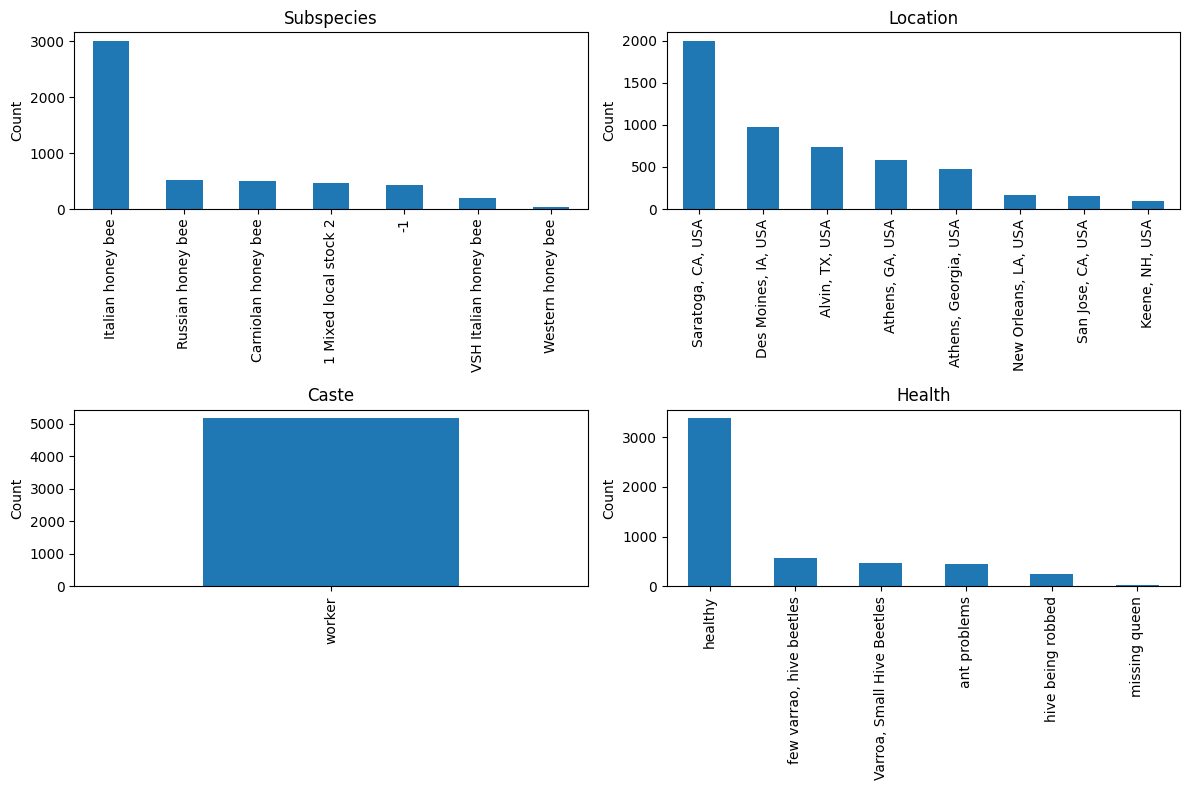

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:100: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


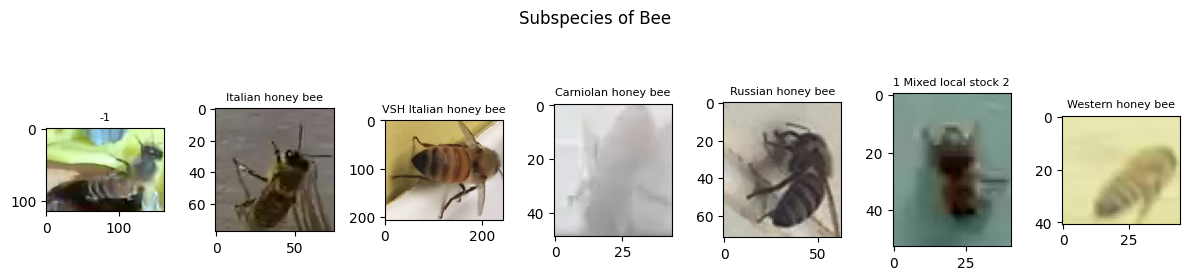

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:116: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


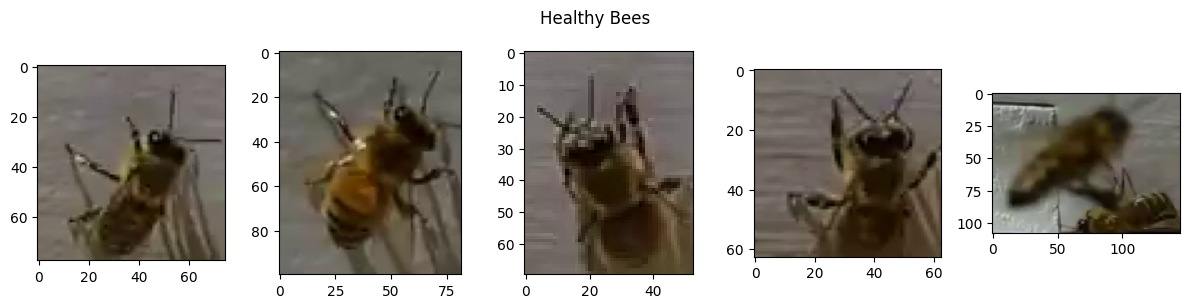

Checking file path: bee_imgs\038_362.png
Checking file path: bee_imgs\030_204.png
Checking file path: bee_imgs\036_094.png
Checking file path: bee_imgs\041_066.png
Checking file path: bee_imgs\034_032.png


c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:137: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


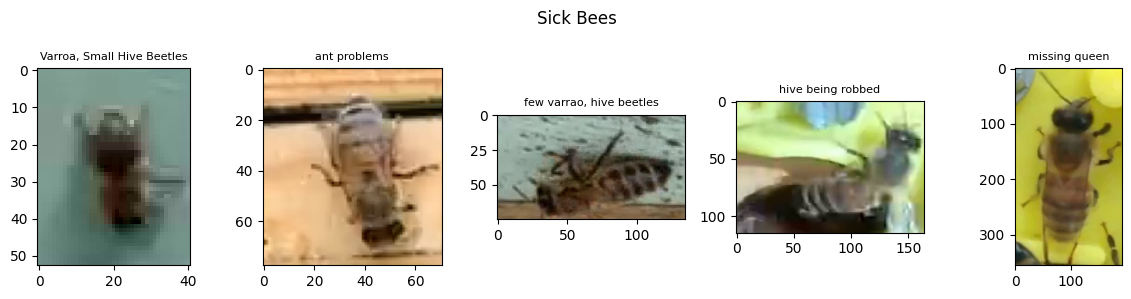

Epoch 1/10
311/311 [==============================] - 7s 22ms/step - loss: 16.0745 - subspecies_loss: 8.1890 - health_loss: 7.8855 - subspecies_accuracy: 0.5849 - health_accuracy: 0.5910 - val_loss: 87.4729 - val_subspecies_loss: 35.4995 - val_health_loss: 51.9734 - val_subspecies_accuracy: 0.4407 - val_health_accuracy: 0.6559
Epoch 2/10
311/311 [==============================] - 7s 22ms/step - loss: 685.5490 - subspecies_loss: 335.1828 - health_loss: 350.3663 - subspecies_accuracy: 0.4737 - health_accuracy: 0.5314 - val_loss: 1038.6244 - val_subspecies_loss: 546.7812 - val_health_loss: 491.8434 - val_subspecies_accuracy: 0.5528 - val_health_accuracy: 0.5747
Epoch 3/10
311/311 [==============================] - 6s 21ms/step - loss: 4644.9302 - subspecies_loss: 2106.7605 - health_loss: 2538.1714 - subspecies_accuracy: 0.4789 - health_accuracy: 0.5450 - val_loss: 8003.2231 - val_subspecies_loss: 2854.7156 - val_health_loss: 5148.5068 - val_subspecies_accuracy: 0.3067 - val_health_accurac

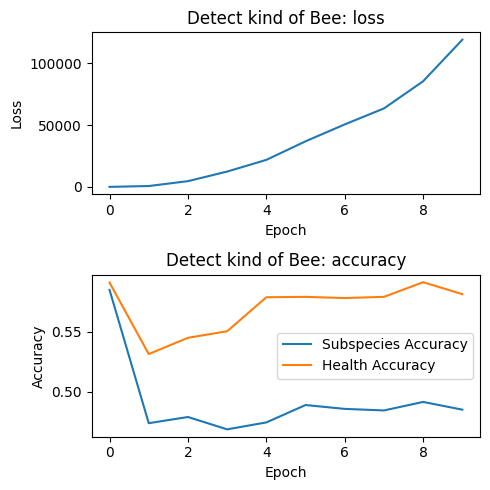

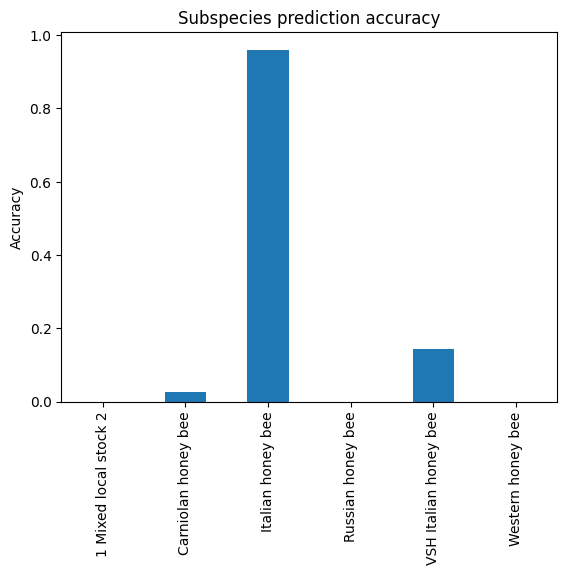

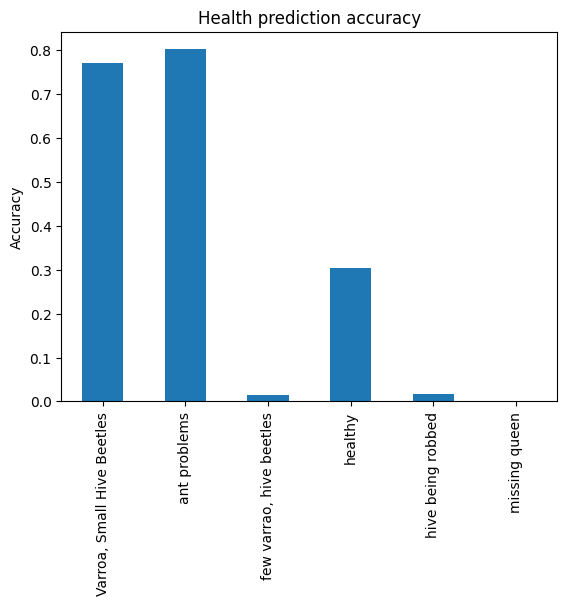

41/41 [==============================] - 1s 13ms/step - loss: 163664.9219 - subspecies_loss: 86502.7812 - health_loss: 77162.1406 - subspecies_accuracy: 0.5746 - health_accuracy: 0.3387
Evaluation: Losses - Subspecies: 163664.921875, Health: 86502.78125, Accuracies - Subspecies: 77162.140625, Health: 0.5746326446533203
Image: 00.jpg, Predicted Subspecies: Italian honey bee, Predicted Health: ant problems
Image: 01.jpg, Predicted Subspecies: Carniolan honey bee, Predicted Health: healthy
Image: 02.jpg, Predicted Subspecies: Carniolan honey bee, Predicted Health: ant problems
Image: 03.jpg, Predicted Subspecies: Carniolan honey bee, Predicted Health: ant problems
Image: 04.jpg, Predicted Subspecies: Italian honey bee, Predicted Health: ant problems
Image: 05.jpg, Predicted Subspecies: Carniolan honey bee, Predicted Health: healthy
Image: 06.jpg, Predicted Subspecies: Italian honey bee, Predicted Health: ant problems


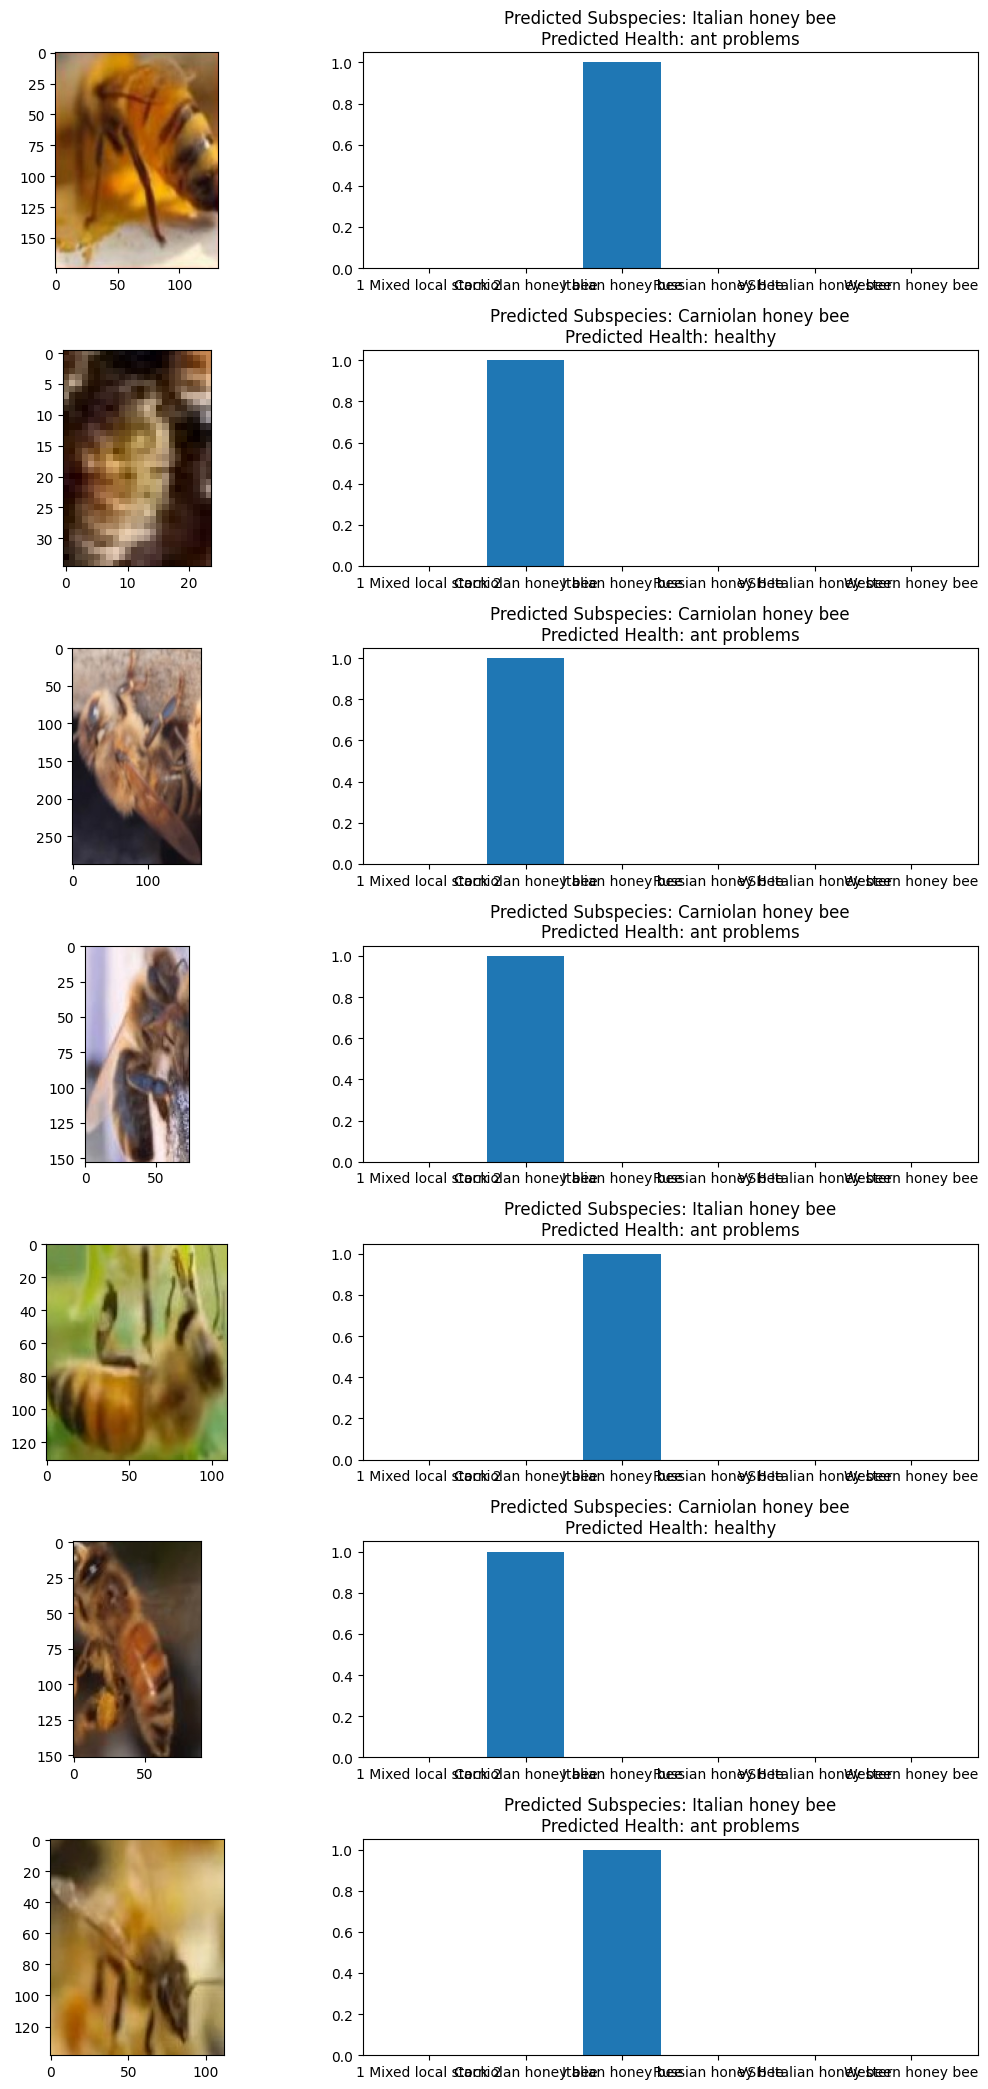

In [5]:
import tensorflow as tf
import pandas as pd
import imageio
import skimage
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Set random seed to make results reproducible
np.random.seed(42)

# Global variables
img_folder = 'bee_imgs'
img_width = 100
img_height = 100
img_channels = 3

# Load existing data
bees = pd.read_csv('bee_data.csv',
                   index_col=False,
                   parse_dates={'datetime': [1, 2]},
                   dtype={'subspecies': 'category', 'health': 'category', 'caste': 'category'})

# Function to read or skip images
def read_or_skip(file):
    try:
        img_path = os.path.join(img_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# Apply the read_or_skip function to create the 'img' column
bees['img'] = bees['file'].apply(read_or_skip)

# Check for null values in the DataFrame
print("Null values in the DataFrame:")
print(bees.isnull().sum())

# Drop rows with null values in the 'img' column
bees.dropna(subset=['img'], inplace=True)

# Visualization of subspecies and health counts

# Create a 2x2 subplot
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot counts of subspecies if the column exists and has non-null values
if 'subspecies' in bees.columns and not bees.subspecies.isnull().all():
    bees.subspecies.value_counts().plot(kind='bar', ax=ax[0, 0])
    ax[0, 0].set_ylabel('Count')
    ax[0, 0].set_title('Subspecies')

# Plot counts of location if the column exists and has non-null values
if 'location' in bees.columns and not bees.location.isnull().all():
    bees.location.value_counts().plot(kind='bar', ax=ax[0, 1])
    ax[0, 1].set_title('Location')
    ax[0, 1].set_ylabel('Count')

# Plot counts of caste if the column exists and has non-null values
if 'caste' in bees.columns and not bees.caste.isnull().all():
    bees.caste.value_counts().plot(kind='bar', ax=ax[1, 0])
    ax[1, 0].set_title('Caste')
    ax[1, 0].set_ylabel('Count')

# Plot counts of health if the column exists and has non-null values
if 'health' in bees.columns and not bees.health.isnull().all():
    bees.health.value_counts().plot(kind='bar', ax=ax[1, 1])
    ax[1, 1].set_title('Health')
    ax[1, 1].set_ylabel('Count')

# Adjust the layout for better spacing
f.subplots_adjust(hspace=0.7)

# Ensure tight layout
f.tight_layout()

# Show the plot
plt.show()

# Update the image loading section
subspecies = bees['subspecies'].unique()[:7]
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 3))
i = 0

# Draw the first found bee of given subspecies
for s in subspecies:
    if s == 'healthy':
        continue
    file = os.path.join(img_folder, bees[bees['subspecies'] == s].iloc[0]['file'])
    im = imageio.imread(file)
    ax[i].imshow(im, resample=True)
    ax[i].set_title(s, fontsize=8)
    i += 1

plt.suptitle("Subspecies of Bee")
plt.tight_layout()
plt.show()

# Display healthy bees
healthy = bees[bees['health'] == 'healthy'].iloc[:5]

f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
# Read image of original size from disk, because bees['img'] contains resized numpy array
for i in range(0, 5):
    file = os.path.join(img_folder, healthy.iloc[i]['file'])
    ax[i].imshow(imageio.imread(file))

plt.suptitle("Healthy Bees")
plt.tight_layout()
plt.show()

health_cats = bees['health'].cat.categories
f, ax = plt.subplots(1, health_cats.size-1, figsize=(12,3))
i = 0

for c in health_cats:
    if c == 'healthy':
        continue

    bee = bees[bees['health'] == c].iloc[0]
    f = bee['file']
    f_path = os.path.join(img_folder, f)  # Use os.path.join for correct path joining

    print(f"Checking file path: {f_path}")

    if os.path.exists(f_path):
        ax[i].imshow(imageio.imread(f_path))
        ax[i].set_title(bee['health'], fontsize=8)
    else:
        print(f"File not found: {f_path}")

    i += 1

plt.suptitle("Sick Bees")
plt.tight_layout()
plt.show()

# Prepare train and test data
labels_subspecies = pd.get_dummies(bees.subspecies, drop_first=True)
labels_health = pd.get_dummies(bees.health)
X = np.stack(bees.img)
train_data, test_data, train_labels_subspecies, test_labels_subspecies, train_labels_health, test_labels_health = train_test_split(
    X, labels_subspecies, labels_health
)

# Define the model using the Functional API
input_layer = Input(shape=(img_width, img_height, img_channels), name='input')
conv1 = Conv2D(5, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPool2D(2)(conv1)
conv2 = Conv2D(15, kernel_size=3, activation='relu')(pool1)
flatten = Flatten()(conv2)

# Output for subspecies prediction
subspecies_output = Dense(labels_subspecies.columns.size, activation='softmax', name='subspecies')(flatten)

# Output for health prediction
health_output = Dense(labels_health.columns.size, activation='softmax', name='health')(flatten)

# Define the model
model = Model(inputs=input_layer, outputs=[subspecies_output, health_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'subspecies': 'categorical_crossentropy', 'health': 'categorical_crossentropy'},
              metrics=['accuracy'])

# Train the model
training = model.fit(
    train_data,
    {'subspecies': train_labels_subspecies, 'health': train_labels_health},
    validation_split=0.2,
    epochs=10,
    batch_size=10
)

# Trained model analysis and evaluation
f, ax = plt.subplots(2, 1, figsize=(5, 5))
ax[0].plot(training.history['loss'])
ax[0].set_title('Detect kind of Bee: loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Accuracy
ax[1].plot(training.history['subspecies_accuracy'], label='Subspecies Accuracy')
ax[1].plot(training.history['health_accuracy'], label='Health Accuracy')
ax[1].set_title('Detect kind of Bee: accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()

# Prediction accuracy by subspecies
test_pred_subspecies, test_pred_health = model.predict(test_data)
acc_by_subspecies = np.logical_and((test_pred_subspecies > 0.5), test_labels_subspecies).sum() / test_labels_subspecies.sum()
acc_by_subspecies.plot(kind='bar', title='Subspecies prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Prediction accuracy by health status
acc_by_health = np.logical_and((test_pred_health > 0.5), test_labels_health).sum() / test_labels_health.sum()
acc_by_health.plot(kind='bar', title='Health prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Evaluation of the model
test_res = model.evaluate(test_data, {'subspecies': test_labels_subspecies, 'health': test_labels_health})
print('Evaluation: Losses - Subspecies: %s, Health: %s, Accuracies - Subspecies: %s, Health: %s' %
      (test_res[0], test_res[1], test_res[2], test_res[3]))

# Save the model
model.save('bee_detection_model.h5')

# Assume you have a directory 'additional_images' containing the new images
additional_images_folder = 'segbee'

# Function to load and preprocess images
def load_and_preprocess_image(file):
    try:
        img_path = os.path.join(additional_images_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# List of new images in the 'additional_images' directory
additional_image_files = os.listdir(additional_images_folder)

# Load and preprocess new images
additional_images = [load_and_preprocess_image(file) for file in additional_image_files]
additional_images = [img for img in additional_images if img is not None]

# Convert the list of images to a NumPy array
additional_images = np.stack(additional_images)

# Predict the subspecies and health status of new images using the trained model
predictions = model.predict(additional_images)
predicted_subspecies_labels = np.argmax(predictions[0], axis=1)
predicted_health_labels = np.argmax(predictions[1], axis=1)

# Convert predicted labels back to subspecies and health categories
predicted_subspecies_categories = labels_subspecies.columns[predicted_subspecies_labels].tolist()
predicted_health_categories = labels_health.columns[predicted_health_labels].tolist()

# Display the results
for i, file in enumerate(additional_image_files):
    print(f"Image: {file}, Predicted Subspecies: {predicted_subspecies_categories[i]}, Predicted Health: {predicted_health_categories[i]}")

# Plot the additional images with predictions
f, ax = plt.subplots(nrows=len(additional_image_files), ncols=2, figsize=(12, 3 * len(additional_image_files)))

for i, file in enumerate(additional_image_files):
    # Load the additional image for display
    img_path = os.path.join(additional_images_folder, file)
    img = skimage.io.imread(img_path)

    # Display the image
    ax[i, 0].imshow(img)
    ax[i, 0].axis('on')

    # Display predicted subspecies and health status
    ax[i, 1].bar(labels_subspecies.columns, predictions[0][i])
    ax[i, 1].set_title(f"Predicted Subspecies: {predicted_subspecies_categories[i]}\nPredicted Health: {predicted_health_categories[i]}")

# Adjust the layout for better spacing
f.tight_layout()
plt.show()

Null values in the DataFrame:
datetime           0
file               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
img                0
dtype: int64


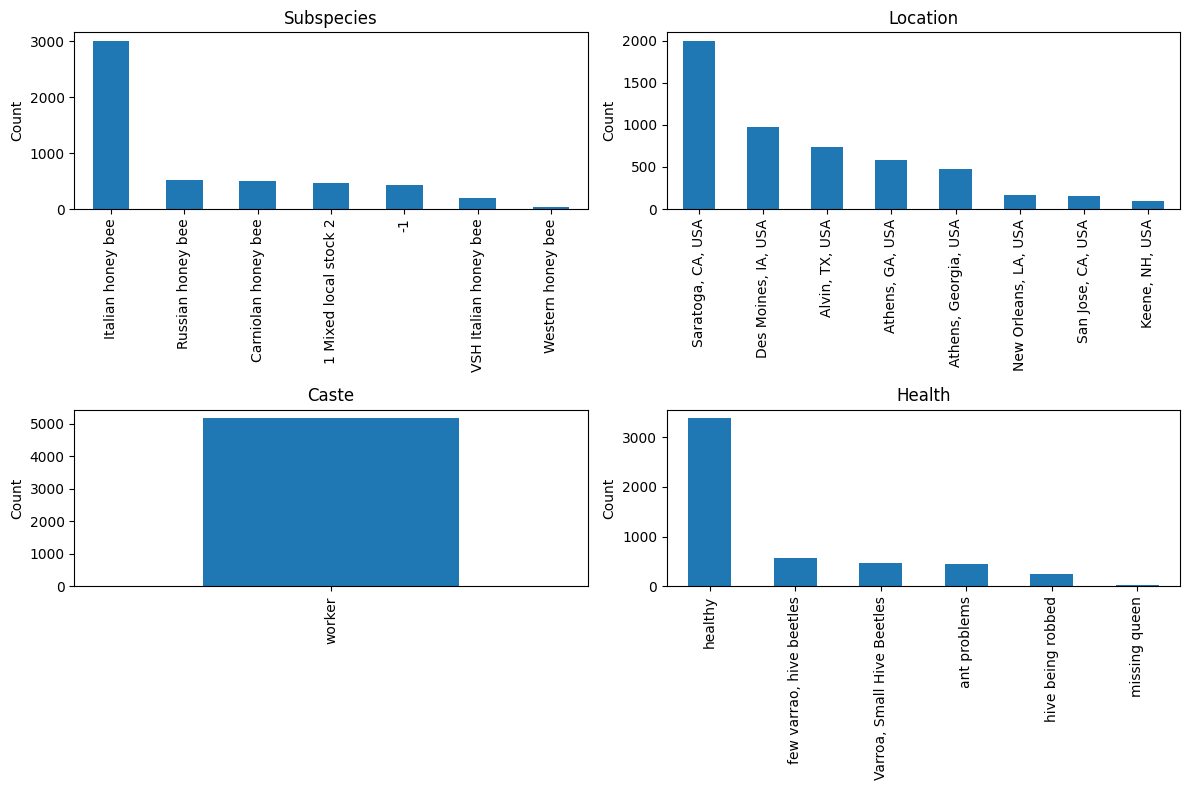

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:100: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


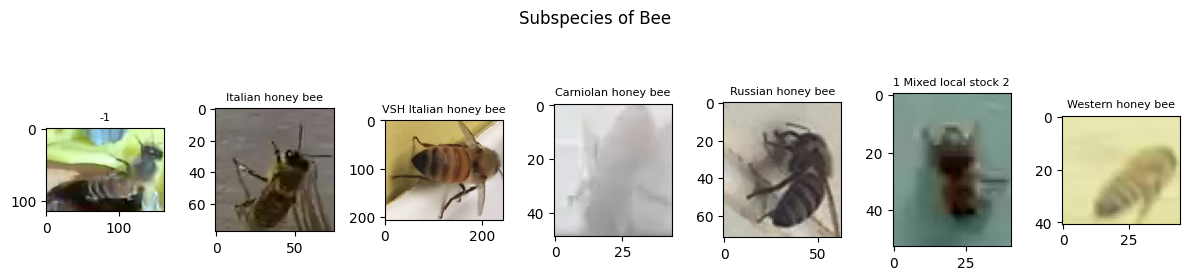

c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:116: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


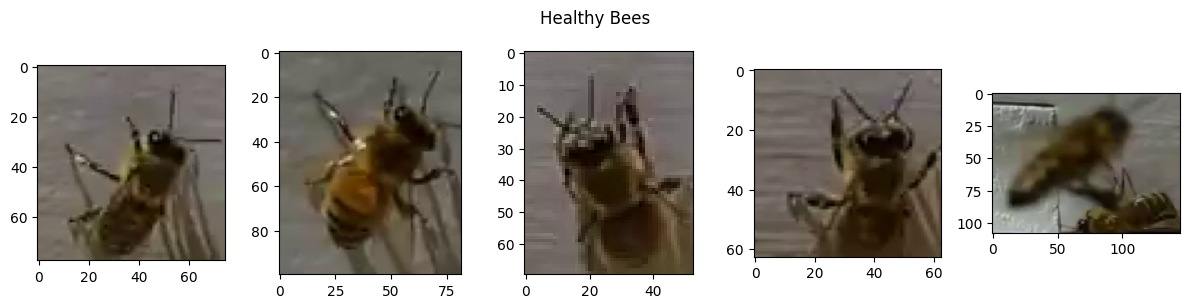

Checking file path: bee_imgs\038_362.png
Checking file path: bee_imgs\030_204.png
Checking file path: bee_imgs\036_094.png
Checking file path: bee_imgs\041_066.png
Checking file path: bee_imgs\034_032.png


c:\Users\ziyan\anaconda3\envs\tf2-gpu\lib\site-packages\ipykernel_launcher.py:137: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


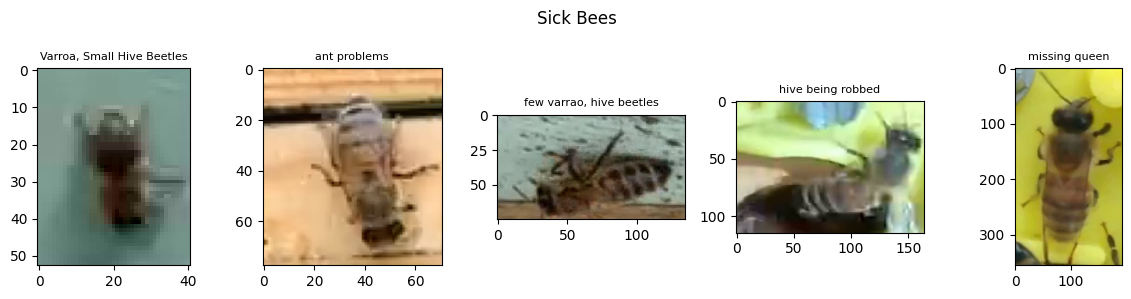

Epoch 1/10
311/311 [==============================] - 7s 20ms/step - loss: 45.6480 - subspecies_loss: 20.9867 - health_loss: 24.6613 - subspecies_accuracy: 0.5852 - health_accuracy: 0.5833 - val_loss: 241.6770 - val_subspecies_loss: 127.0003 - val_health_loss: 114.6768 - val_subspecies_accuracy: 0.4974 - val_health_accuracy: 0.2861
Epoch 2/10
311/311 [==============================] - 6s 20ms/step - loss: 1577.2997 - subspecies_loss: 703.0146 - health_loss: 874.2853 - subspecies_accuracy: 0.4528 - health_accuracy: 0.5417 - val_loss: 5173.6509 - val_subspecies_loss: 3367.4314 - val_health_loss: 1806.2189 - val_subspecies_accuracy: 0.4059 - val_health_accuracy: 0.6598
Epoch 3/10
311/311 [==============================] - 6s 20ms/step - loss: 6852.6016 - subspecies_loss: 3382.3174 - health_loss: 3470.2842 - subspecies_accuracy: 0.4670 - health_accuracy: 0.5601 - val_loss: 6851.2505 - val_subspecies_loss: 3873.3208 - val_health_loss: 2977.9302 - val_subspecies_accuracy: 0.4613 - val_health

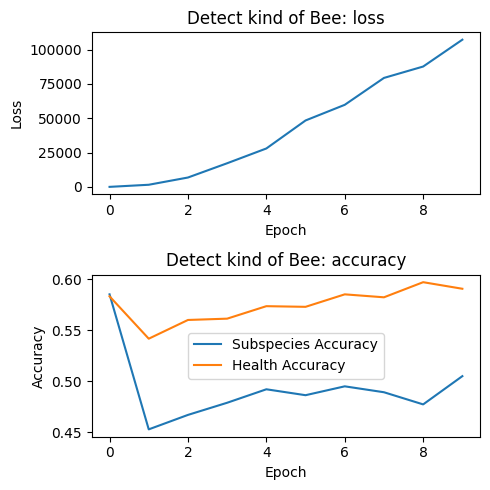

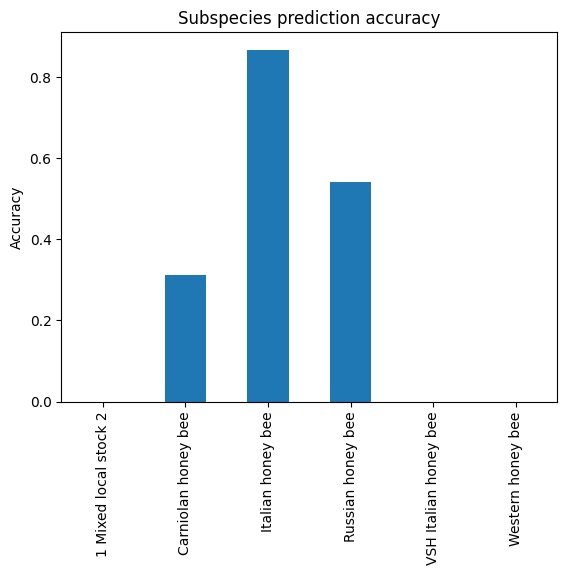

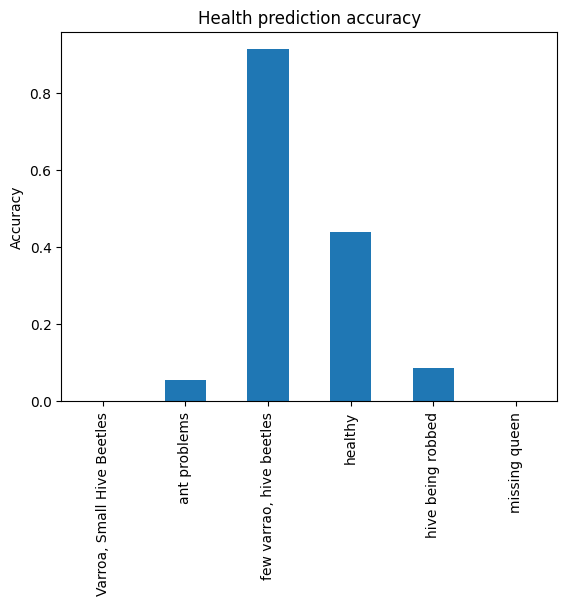

41/41 [==============================] - 1s 13ms/step - loss: 180254.5312 - subspecies_loss: 84619.3438 - health_loss: 95635.2188 - subspecies_accuracy: 0.5947 - health_accuracy: 0.4006
Evaluation: Losses - Subspecies: 180254.53125, Health: 84619.34375, Accuracies - Subspecies: 95635.21875, Health: 0.5947409272193909
Image: 00.jpg, Predicted Subspecies: Italian honey bee, Predicted Health: hive being robbed
Image: 01.jpg, Predicted Subspecies: Carniolan honey bee, Predicted Health: healthy
Image: 02.jpg, Predicted Subspecies: Russian honey bee, Predicted Health: hive being robbed
Image: 03.jpg, Predicted Subspecies: Russian honey bee, Predicted Health: few varrao, hive beetles
Image: 04.jpg, Predicted Subspecies: Russian honey bee, Predicted Health: few varrao, hive beetles
Image: 05.jpg, Predicted Subspecies: Carniolan honey bee, Predicted Health: healthy
Image: 06.jpg, Predicted Subspecies: Russian honey bee, Predicted Health: healthy


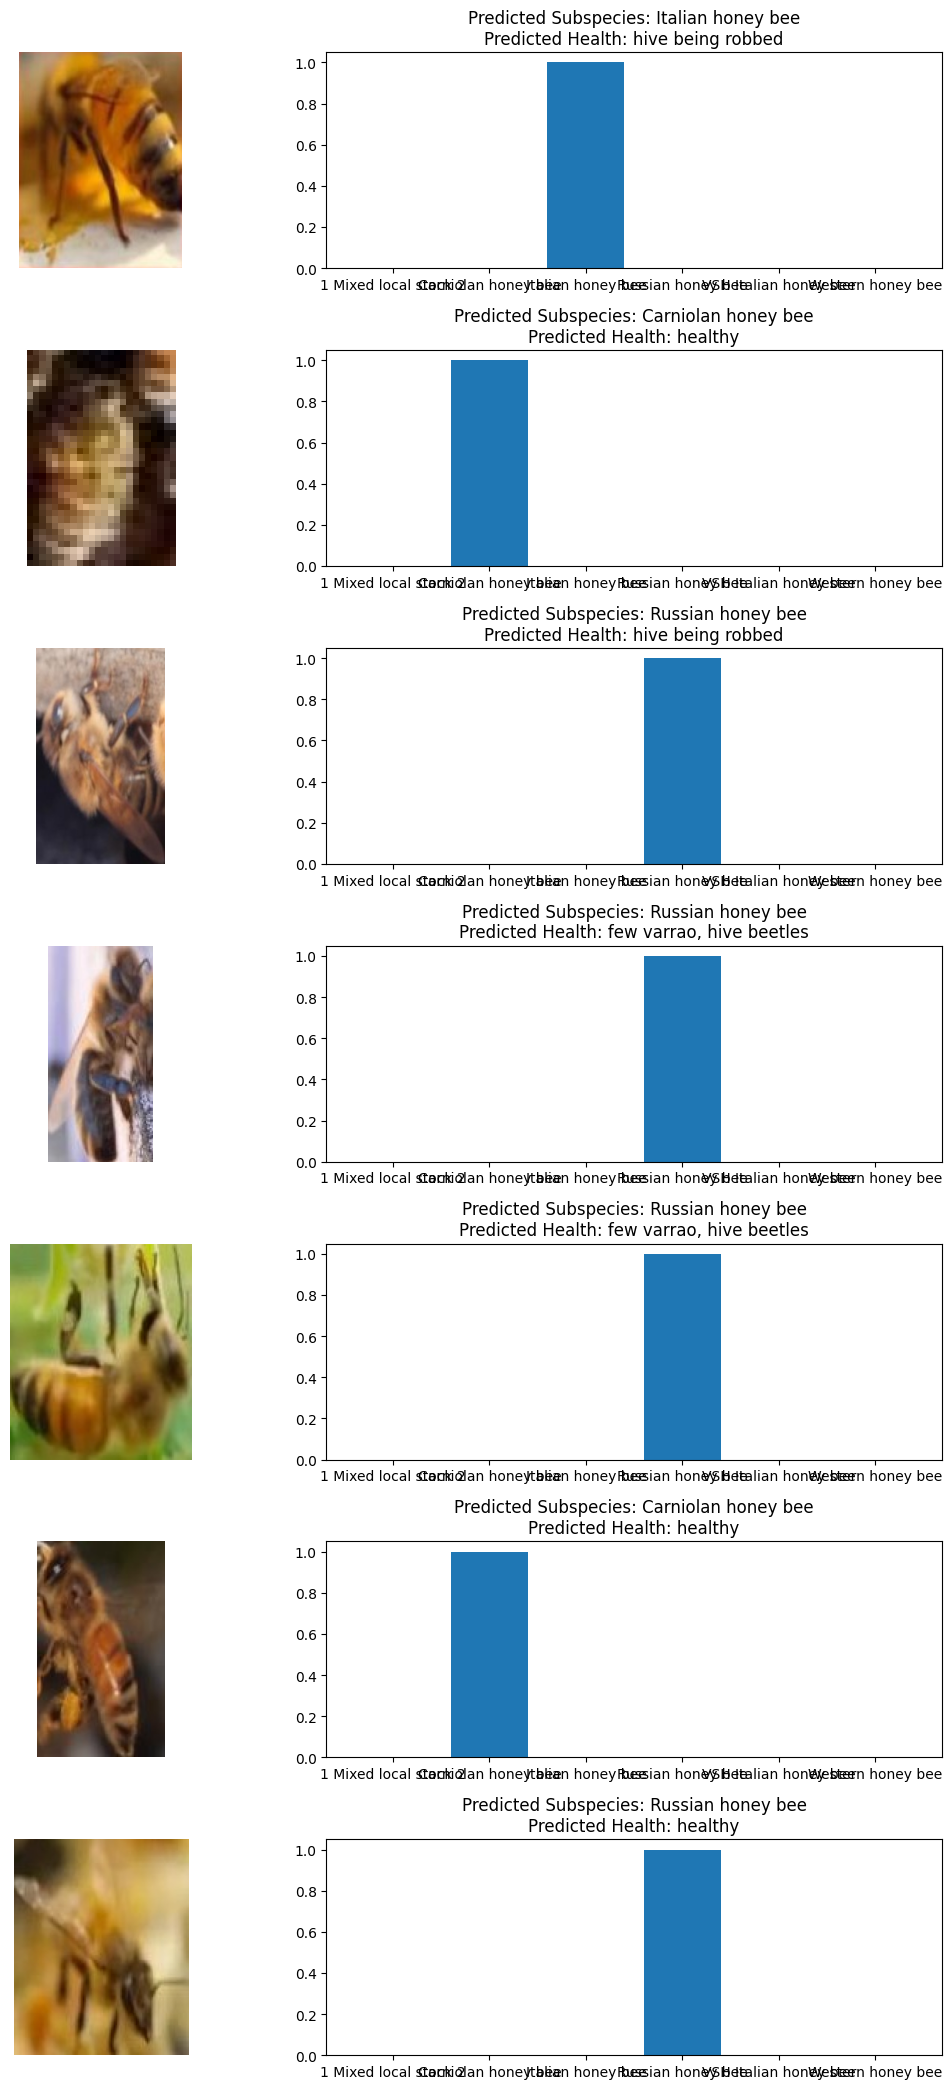

In [4]:
import tensorflow as tf
import pandas as pd
import imageio
import skimage
import skimage.io
import skimage.transform
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense
from keras.callbacks import EarlyStopping
from keras.preprocessing.image import ImageDataGenerator

# Set random seed to make results reproducible
np.random.seed(42)

# Global variables
img_folder = 'bee_imgs'
img_width = 100
img_height = 100
img_channels = 3

# Load existing data
bees = pd.read_csv('bee_data.csv',
                   index_col=False,
                   parse_dates={'datetime': [1, 2]},
                   dtype={'subspecies': 'category', 'health': 'category', 'caste': 'category'})

# Function to read or skip images
def read_or_skip(file):
    try:
        img_path = os.path.join(img_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# Apply the read_or_skip function to create the 'img' column
bees['img'] = bees['file'].apply(read_or_skip)

# Check for null values in the DataFrame
print("Null values in the DataFrame:")
print(bees.isnull().sum())

# Drop rows with null values in the 'img' column
bees.dropna(subset=['img'], inplace=True)

# Visualization of subspecies and health counts

# Create a 2x2 subplot
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plot counts of subspecies if the column exists and has non-null values
if 'subspecies' in bees.columns and not bees.subspecies.isnull().all():
    bees.subspecies.value_counts().plot(kind='bar', ax=ax[0, 0])
    ax[0, 0].set_ylabel('Count')
    ax[0, 0].set_title('Subspecies')

# Plot counts of location if the column exists and has non-null values
if 'location' in bees.columns and not bees.location.isnull().all():
    bees.location.value_counts().plot(kind='bar', ax=ax[0, 1])
    ax[0, 1].set_title('Location')
    ax[0, 1].set_ylabel('Count')

# Plot counts of caste if the column exists and has non-null values
if 'caste' in bees.columns and not bees.caste.isnull().all():
    bees.caste.value_counts().plot(kind='bar', ax=ax[1, 0])
    ax[1, 0].set_title('Caste')
    ax[1, 0].set_ylabel('Count')

# Plot counts of health if the column exists and has non-null values
if 'health' in bees.columns and not bees.health.isnull().all():
    bees.health.value_counts().plot(kind='bar', ax=ax[1, 1])
    ax[1, 1].set_title('Health')
    ax[1, 1].set_ylabel('Count')

# Adjust the layout for better spacing
f.subplots_adjust(hspace=0.7)

# Ensure tight layout
f.tight_layout()

# Show the plot
plt.show()

# Update the image loading section
subspecies = bees['subspecies'].unique()[:7]
f, ax = plt.subplots(nrows=1, ncols=7, figsize=(12, 3))
i = 0

# Draw the first found bee of given subspecies
for s in subspecies:
    if s == 'healthy':
        continue
    file = os.path.join(img_folder, bees[bees['subspecies'] == s].iloc[0]['file'])
    im = imageio.imread(file)
    ax[i].imshow(im, resample=True)
    ax[i].set_title(s, fontsize=8)
    i += 1

plt.suptitle("Subspecies of Bee")
plt.tight_layout()
plt.show()

# Display healthy bees
healthy = bees[bees['health'] == 'healthy'].iloc[:5]

f, ax = plt.subplots(nrows=1, ncols=5, figsize=(12, 3))
# Read image of original size from disk, because bees['img'] contains resized numpy array
for i in range(0, 5):
    file = os.path.join(img_folder, healthy.iloc[i]['file'])
    ax[i].imshow(imageio.imread(file))

plt.suptitle("Healthy Bees")
plt.tight_layout()
plt.show()

health_cats = bees['health'].cat.categories
f, ax = plt.subplots(1, health_cats.size-1, figsize=(12,3))
i = 0

for c in health_cats:
    if c == 'healthy':
        continue

    bee = bees[bees['health'] == c].iloc[0]
    f = bee['file']
    f_path = os.path.join(img_folder, f)  # Use os.path.join for correct path joining

    print(f"Checking file path: {f_path}")

    if os.path.exists(f_path):
        ax[i].imshow(imageio.imread(f_path))
        ax[i].set_title(bee['health'], fontsize=8)
    else:
        print(f"File not found: {f_path}")

    i += 1

plt.suptitle("Sick Bees")
plt.tight_layout()
plt.show()

# Prepare train and test data
labels_subspecies = pd.get_dummies(bees.subspecies, drop_first=True)
labels_health = pd.get_dummies(bees.health)
X = np.stack(bees.img)
train_data, test_data, train_labels_subspecies, test_labels_subspecies, train_labels_health, test_labels_health = train_test_split(
    X, labels_subspecies, labels_health
)

# Define the model using the Functional API
input_layer = Input(shape=(img_width, img_height, img_channels), name='input')
conv1 = Conv2D(5, kernel_size=3, activation='relu')(input_layer)
pool1 = MaxPool2D(2)(conv1)
conv2 = Conv2D(15, kernel_size=3, activation='relu')(pool1)
flatten = Flatten()(conv2)

# Output for subspecies prediction
subspecies_output = Dense(labels_subspecies.columns.size, activation='softmax', name='subspecies')(flatten)

# Output for health prediction
health_output = Dense(labels_health.columns.size, activation='softmax', name='health')(flatten)

# Define the model
model = Model(inputs=input_layer, outputs=[subspecies_output, health_output])

# Compile the model
model.compile(optimizer='adam',
              loss={'subspecies': 'categorical_crossentropy', 'health': 'categorical_crossentropy'},
              metrics=['accuracy'])

# Train the model
training = model.fit(
    train_data,
    {'subspecies': train_labels_subspecies, 'health': train_labels_health},
    validation_split=0.2,
    epochs=10,
    batch_size=10
)

# Trained model analysis and evaluation
f, ax = plt.subplots(2, 1, figsize=(5, 5))
ax[0].plot(training.history['loss'])
ax[0].set_title('Detect kind of Bee: loss')
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')

# Accuracy
ax[1].plot(training.history['subspecies_accuracy'], label='Subspecies Accuracy')
ax[1].plot(training.history['health_accuracy'], label='Health Accuracy')
ax[1].set_title('Detect kind of Bee: accuracy')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].legend()
plt.tight_layout()
plt.show()

# Prediction accuracy by subspecies
test_pred_subspecies, test_pred_health = model.predict(test_data)
acc_by_subspecies = np.logical_and((test_pred_subspecies > 0.5), test_labels_subspecies).sum() / test_labels_subspecies.sum()
acc_by_subspecies.plot(kind='bar', title='Subspecies prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Prediction accuracy by health status
acc_by_health = np.logical_and((test_pred_health > 0.5), test_labels_health).sum() / test_labels_health.sum()
acc_by_health.plot(kind='bar', title='Health prediction accuracy')
plt.ylabel('Accuracy')
plt.show()

# Evaluation of the model
test_res = model.evaluate(test_data, {'subspecies': test_labels_subspecies, 'health': test_labels_health})
print('Evaluation: Losses - Subspecies: %s, Health: %s, Accuracies - Subspecies: %s, Health: %s' %
      (test_res[0], test_res[1], test_res[2], test_res[3]))

# Save the model
model.save('bee_detection_model.h5')

# Assume you have a directory 'additional_images' containing the new images
additional_images_folder = 'segbee'

# Function to load and preprocess images
def load_and_preprocess_image(file):
    try:
        img_path = os.path.join(additional_images_folder, file)
        img = skimage.io.imread(img_path)
        img = skimage.transform.resize(img, (img_width, img_height), mode='reflect')
        return img[:, :, :img_channels]
    except Exception as e:
        print(f"Error loading or resizing image {file}: {str(e)}")
        return None

# List of new images in the 'additional_images' directory
additional_image_files = os.listdir(additional_images_folder)

# Load and preprocess new images
additional_images = [load_and_preprocess_image(file) for file in additional_image_files]
additional_images = [img for img in additional_images if img is not None]

# Convert the list of images to a NumPy array
additional_images = np.stack(additional_images)

# Predict the subspecies and health status of new images using the trained model
predictions = model.predict(additional_images)
predicted_subspecies_labels = np.argmax(predictions[0], axis=1)
predicted_health_labels = np.argmax(predictions[1], axis=1)

# Convert predicted labels back to subspecies and health categories
predicted_subspecies_categories = labels_subspecies.columns[predicted_subspecies_labels].tolist()
predicted_health_categories = labels_health.columns[predicted_health_labels].tolist()

# Display the results
for i, file in enumerate(additional_image_files):
    print(f"Image: {file}, Predicted Subspecies: {predicted_subspecies_categories[i]}, Predicted Health: {predicted_health_categories[i]}")

# Plot the additional images with predictions
f, ax = plt.subplots(nrows=len(additional_image_files), ncols=2, figsize=(12, 3 * len(additional_image_files)))

for i, file in enumerate(additional_image_files):
    # Load the additional image for display
    img_path = os.path.join(additional_images_folder, file)
    img = skimage.io.imread(img_path)

    # Display the image
    ax[i, 0].imshow(img)
    ax[i, 0].axis('off')

    # Display predicted subspecies and health status
    ax[i, 1].bar(labels_subspecies.columns, predictions[0][i])
    ax[i, 1].set_title(f"Predicted Subspecies: {predicted_subspecies_categories[i]}\nPredicted Health: {predicted_health_categories[i]}")

# Adjust the layout for better spacing
f.tight_layout()

# Show the plot
plt.show()